In [9]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [19]:
# Find category names
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x116d55810>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1}

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results=[]
june_results=session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [7]:
#  3. Convert the June temperatures to a list.
june_temp=june_results.all()
print(june_temp)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [18]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df=pd.DataFrame(june_results,columns=['date','June Temps'])
print(june_df)

            date  June Temps
0     2010-06-01        78.0
1     2010-06-02        76.0
2     2010-06-03        78.0
3     2010-06-04        76.0
4     2010-06-05        77.0
...          ...         ...
1695  2017-06-26        79.0
1696  2017-06-27        74.0
1697  2017-06-28        74.0
1698  2017-06-29        76.0
1699  2017-06-30        75.0

[1700 rows x 2 columns]


In [20]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [22]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results=[]
december_results=session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date) == 12)

In [24]:
# 7. Convert the December temperatures to a list.
december_temp=december_results.all()
print(december_temp)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [25]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df=pd.DataFrame(december_temp, columns=['date', 'December Temps'])
print(december_df)

            date  December Temps
0     2010-12-01            76.0
1     2010-12-03            74.0
2     2010-12-04            74.0
3     2010-12-06            64.0
4     2010-12-07            64.0
...          ...             ...
1512  2016-12-27            71.0
1513  2016-12-28            71.0
1514  2016-12-29            69.0
1515  2016-12-30            65.0
1516  2016-12-31            65.0

[1517 rows x 2 columns]


In [26]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Additional Queries to Gather More Weather Data

In [28]:
# Percipitation Data- June
june_prcp=[]
june_prcp=session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

june_prcp_df=pd.DataFrame(june_prcp, columns=['date', 'June Percipitation'])
print(june_prcp_df)

            date  June Percipitation
0     2010-06-01                0.00
1     2010-06-02                0.01
2     2010-06-03                0.00
3     2010-06-04                0.00
4     2010-06-05                0.00
...          ...                 ...
1695  2017-06-26                0.02
1696  2017-06-27                0.10
1697  2017-06-28                0.02
1698  2017-06-29                0.04
1699  2017-06-30                0.20

[1700 rows x 2 columns]


In [29]:
# Summary Statistics for June Percipitation
june_prcp_df.describe()

,June Percipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [30]:
# Percipitation Data- December
december_prcp=[]
december_prcp=session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

dec_prcp_df=pd.DataFrame(december_prcp, columns=['date', 'December Percipitation'])
print(dec_prcp_df)

            date  December Percipitation
0     2010-12-01                    0.04
1     2010-12-03                    0.00
2     2010-12-04                    0.00
3     2010-12-06                    0.00
4     2010-12-07                    0.00
...          ...                     ...
1512  2016-12-27                    0.14
1513  2016-12-28                    0.14
1514  2016-12-29                    1.03
1515  2016-12-30                    2.37
1516  2016-12-31                    0.90

[1517 rows x 2 columns]


In [31]:
#Summary Stats for December Percipitation
dec_prcp_df.describe()

,December Percipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [33]:
#Dependencies for graphs
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

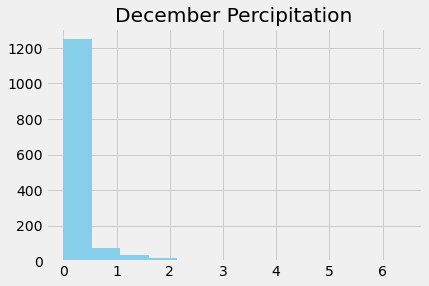

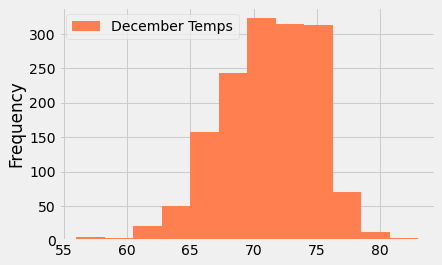

In [45]:
# Histogram of Decemeber
dec_prcp_df.hist(bins=12,color='skyblue')
december_df.plot.hist(bins=12,color='coral')

plt.show()

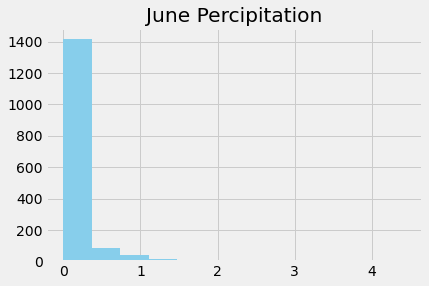

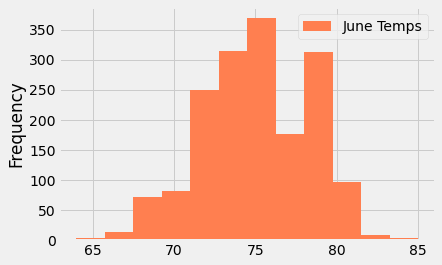

In [46]:
# Histogram of June
june_prcp_df.hist(bins=12,color='skyblue')
june_df.plot.hist(bins=12,color='coral')

plt.show()

array([[<AxesSubplot:title={'center':'November Percipitation'}>]],
      dtype=object)

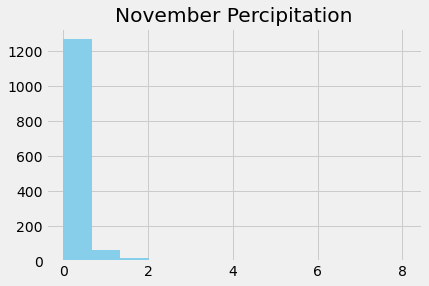

In [49]:
#November Data
nov_prcp=[]
nov_prcp=session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 11).all()

nov_prcp_df=pd.DataFrame(nov_prcp, columns=['date', 'November Percipitation'])

nov_prcp_df.hist(bins=12,color='skyblue')


array([[<AxesSubplot:title={'center':'March Percipitation'}>]],
      dtype=object)

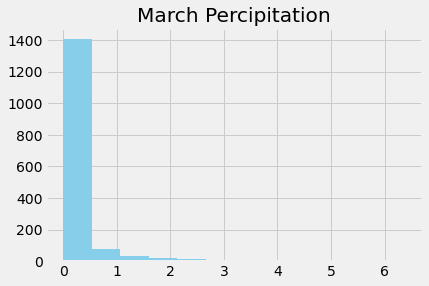

In [48]:
#March Data
march_prcp=[]
march_prcp=session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 3).all()

march_prcp_df=pd.DataFrame(march_prcp, columns=['date', 'March Percipitation'])

march_prcp_df.hist(bins=12,color='skyblue')